## Results - Lasso Regression

This is the compilation of a small proportion experiment to evaluate the possible impact of LASSO regression while training a datamodel


In [2]:
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt
import os

## Load Data

In [6]:
data = []

renaming_dict = {
    "preview_0_datamodels.feather": "LR",
    "preview_1_datamodels.feather": "lasso_1",
    "preview_2_datamodels.feather": "lasso_2",
    "preview_3_datamodels.feather": "lasso_3",
    "preview_4_datamodels.feather": "lasso_4",
    "rag.feather": "rag",
    "baseline.feather": "baseline",
}


for f in os.listdir("."):
    if f.endswith(".feather"):
        data.append(pl.read_ipc(f).with_columns(pl.lit(renaming_dict[f]).alias("experiment_type")))
df = pl.concat(data)
df.head()




idx,mean,max,metric,experiment_type
i64,f64,f64,str,str
0,0.0,0.0,"""rouge_l""","""lasso_4"""
1,1.0,1.0,"""rouge_l""","""lasso_4"""
2,1.0,1.0,"""rouge_l""","""lasso_4"""
3,1.0,1.0,"""rouge_l""","""lasso_4"""
4,1.0,1.0,"""rouge_l""","""lasso_4"""


## Plot Results

<Axes: xlabel='experiment_type', ylabel='mean'>

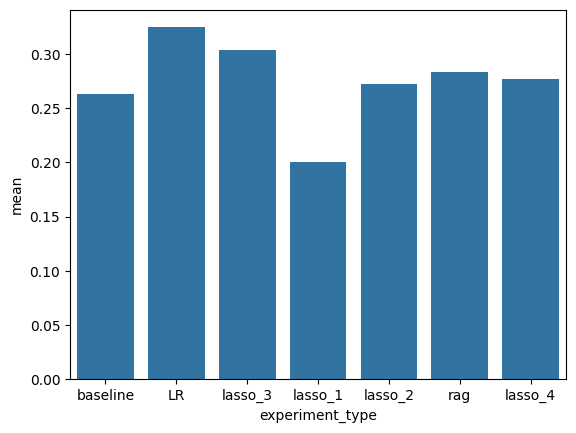

In [8]:
_agg_df = (
    df.
    group_by(["experiment_type"]).
    agg(
        pl.col("mean").mean().alias("mean"),
        pl.col("max").mean().alias("mean_max"),
    )
)

sns.barplot(data=_agg_df, x="experiment_type", y="mean")

<Axes: xlabel='experiment_type', ylabel='count_mean'>

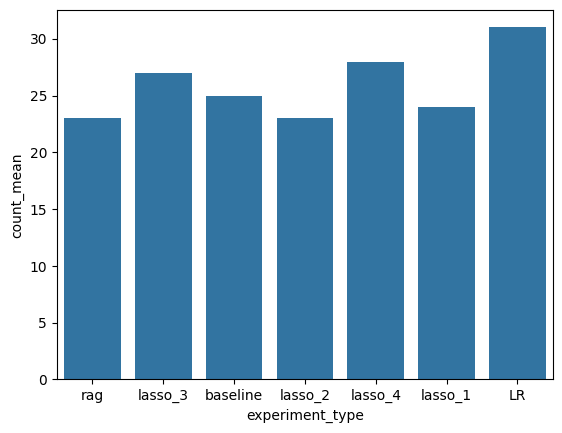

In [9]:
_agg_df = (
    df
    .filter(pl.col("mean") > 0)
    .group_by(["experiment_type"])
    .agg(
        pl.col("mean").count().alias("count_mean"),
    )
)

sns.barplot(data=_agg_df, x="experiment_type", y="count_mean")